<h1 align="center">Series de tiempo</h1>
</center><img src="data/images/time_series.png" width=800></center>


### Videos
- [Buen video](https://www.youtube.com/watch?v=rPrJ7sSbTqM) sobre tendencia, estacionalidad y cambios cíclicos.
- Video sobre [AR model](https://www.youtube.com/watch?v=Mc6sBAUdDP4)
- Video sobre [MA model](https://www.youtube.com/watch?v=zNLG8tsA_Go)
- Video sobre [ARIMA model](https://www.youtube.com/watch?v=dXND1OEBABI)

### Importamos librerías

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

### Creamos datos de prueba

Crearemos una serie de tiempo con:
- Tendencia nula
- Estacionalidad
- Sin cambios cíclicos presentes o aparentes
- Sin cambios irregulares

Text(0, 0.5, 'Xt')

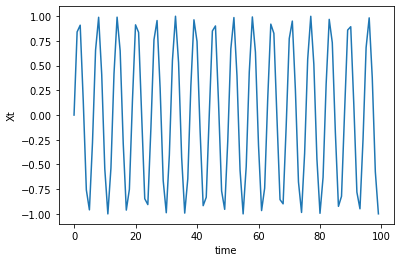

In [6]:
t = np.arange(0,100,1)
xt = np.sin(t)
plt.plot(t,xt)
plt.xlabel("time")
plt.ylabel("Xt")

### Agregamos tendencia
 
Agregaremos una tendencia creciente a los datos de la celda anterior

Text(0, 0.5, 'Xt')

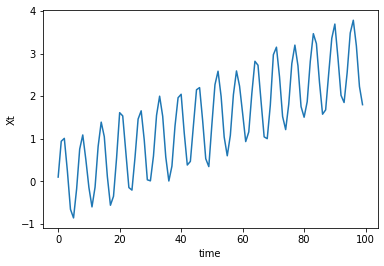

In [21]:
def tendency(n, power):
    ft = []
    for i in range(n):
        ft = ft + [i*power]*10
    return ft

ft = tendency(10, 0.1)
xt = ft + xt
plt.plot(t,xt)
plt.xlabel("time")
plt.ylabel("Xt")

### Ajustamos una regresión lineal para ver tendencia

Text(0, 0.5, 'Xt')

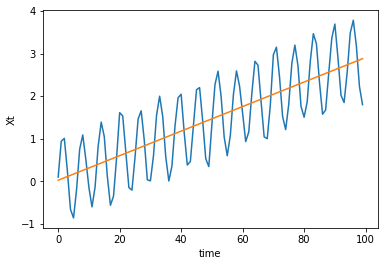

In [23]:
X = t.reshape(-1,1)
y = xt.reshape(-1,1)
reg = LinearRegression().fit(X, y)
beta_0 = reg.intercept_
beta_1 = reg.coef_
best_line = beta_1*X + beta_0
plt.plot(t,xt)
plt.plot(t, best_line)
plt.xlabel("time")
plt.ylabel("Xt")

### Cambios irregulares

La siguiente [imagen](https://www.bloomberg.com/news/articles/2018-11-03/trump-tweet-risk-and-what-empowered-democrats-mean-for-stocks) demuestra un ejemplo del erratismo existente en los precios de acciones. En este ejemplo, puede verse como un tweet de Trump afecta el precio de la bolsa.

</center><img src="https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iOdTrQrpp3T4/v1/-1x-1.png" width=800></center>

### Zero mean model

Crearemos datos de ruido blanco, es decir:
- Datos independientes e identicamente distribuidos.
- Media constante.
- Varianza constante.

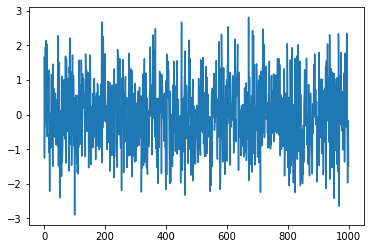

In [25]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

plt.plot(samples)
plt.show()

### Random walk

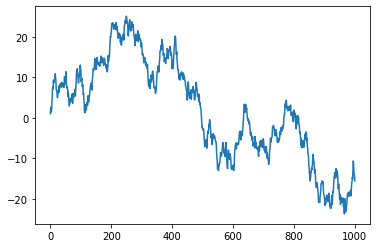

In [27]:
def random_walk(x_0, noise):
    xt = [x_0]
    for i in range(len(noise)):
        xt.append(xt[i]+noise[i])
    return xt

random = random_walk(1, samples)
plt.plot(random)
plt.show()

### Estacionariedad

[Fuente](https://machinelearningmastery.com/time-series-data-stationary-python/) del ejemplo.

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

<Figure size 1080x864 with 0 Axes>

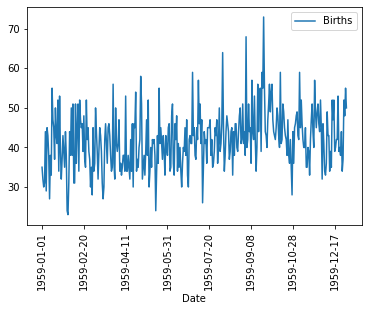

In [48]:
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

series = pd.read_csv("data/csv/daily-total-female-births.csv",
                     header=0,
                     index_col=0)


plt.figure(figsize=(15, 12))
series.plot()
plt.xticks(rotation='vertical')

In [49]:
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


### MA model (Moving Average model)

## $$ Y_{t} = \omega + \theta.\epsilon_{t-1} + \epsilon_{t} $$

- $Y_{t}$: target
- $\omega$: intercept
- $\theta$: coefficient
- $\epsilon_{t-1}$: lagged error
- $\epsilon_{t}$: error

</center><img src="data/images/ma_model.png" width=800></center>

### AR model (Auto Regressive model)

## $$ Y_{t} = \omega + \phi.Y_{t-1} + \epsilon_{t} $$

- $Y_{t}$: target
- $\omega$: intercept
- $\phi$: coefficient
- $Y_{t-1}$: lagged target
- $\epsilon_{t}$: error

</center><img src="data/images/ar_model.png" width=800></center>